 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# **Reclutamiento de Empleados con Aprendizaje Automático | Colocación Laboral con Python | Sistema de Adquisición de Talento en RR.HH.**

En el mundo acelerado de hoy, las empresas buscan constantemente formas innovadoras para optimizar sus procesos, y la gestión de recursos humanos (RR.HH.) no es una excepción. Los métodos de reclutamiento tradicionales suelen ser consumidores de tiempo y carecen de la eficiencia necesaria para identificar a los mejores candidatos para el trabajo. Sin embargo, con los avances en aprendizaje automático y análisis de datos, los profesionales de RR.HH. ahora tienen herramientas poderosas a su disposición para revolucionar el proceso de reclutamiento.




## **Entendimiento del Proyecto:**
El proyecto está diseñado para aprovechar las técnicas de ML para predecir colocaciones laborales basadas en varios factores, como el rendimiento académico, la experiencia laboral, la especialización, y más.

Al analizar los datos históricos de empleados anteriores, el sistema busca identificar patrones y correlaciones que puedan predecir si un candidato es probable que sea colocado o no.

In [1]:
import numpy as np
import pandas as pd

In [98]:
df = pd.read_csv("https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Placement_Data_Full_Class.csv")

In [99]:
# mostramos la estructura del dataframe : head
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## **Diccionario**

1. **Sl_no**: Número de serie o identificador único para cada entrada o persona.
2. **gender**: Género del individuo.
3. **ssc_p**: Porcentaje obtenido en los exámenes de secundaria (SSC suele referirse a Secondary School Certificate).
4. **ssc_b**: Junta o comité organizador de los exámenes de secundaria.
5. **hsc_p**: Porcentaje obtenido en los exámenes de educación superior secundaria (HSC se refiere a Higher Secondary Certificate).
6. **hsc_b**: Junta o comité organizador de los exámenes de educación superior secundaria.
7. **hsc_s**: Especialización o área de estudio en la educación superior secundaria (ciencias, comercio, arte, etc.).
8. **degree_p**: Porcentaje obtenido en el grado universitario.
9. **degree_t**: Tipo de grado o campo de estudio en la educación universitaria (por ejemplo, tecnología, artes, comercio).
10. **workex**: Experiencia laboral (generalmente indicado como 'Yes' o 'No').
11. **etest_p**: Porcentaje obtenido en un examen de prueba, posiblemente un examen de empleabilidad o habilidades específicas.
12. **specialisation**: Especialización en estudios de posgrado, especialmente en programas de MBA.
13. **mba_p**: Porcentaje obtenido en el programa de MBA.
14. **status**: Estado del empleo o resultado del proceso de selección (como 'employed' o 'unemployed').
15. **salary**: Salario ofrecido o actual del individuo.



In [100]:
#Analizamos que variables no ayudan y lo eliminamos: ssc_b','hsc_b','hsc_s','degree_t','salary
#Código aquí
df = df.drop(['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1)
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


## Preprocessing

## Encoding

 Limpiar y preparar el conjunto de datos para el análisis. Esto incluye manejar valores faltantes, codificar variables categóricas y escalar características numéricas.

In [ ]:
# codifica genero, experiencia de trabajo, estatus y especialización
# Puedes usar esta celda como punto de partida

In [52]:
valores_unicos = df['gender'].unique()
print(valores_unicos)

['M' 'F']


In [101]:
# Para Genero
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [81]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1


In [28]:
valores_unicos = df['workex'].unique()
print(valores_unicos)

['No' 'Yes']


In [102]:
# Para workex
df['workex'] = df['workex'].map({'No': 0, 'Yes': 1})

In [29]:
valores_unicos = df['status'].unique()
print(valores_unicos)

['Placed' 'Not Placed']


In [103]:
# Para status
df['status'] = df['status'].map({'Not Placed': 0, 'Placed': 1})

In [30]:
valores_unicos = df['specialisation'].unique()
print(valores_unicos)

['Mkt&HR' 'Mkt&Fin']


In [104]:
# Para specialisation
df['specialisation'] = df['specialisation'].map({'Mkt&HR': 0, 'Mkt&Fin': 1})

In [105]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,0.344186,72.100558,0.558140,62.278186,0.688372
std,62.209324,0.479168,10.827205,10.897509,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240
min,1.000000,0.000000,40.890000,37.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,0.000000,71.000000,1.000000,62.000000,1.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000


In [106]:
#Contar los registros
df.count()

sl_no             215
gender            215
ssc_p             215
hsc_p             215
degree_p          215
workex            215
etest_p           215
specialisation    215
mba_p             215
status            215
dtype: int64

In [107]:
#Eliminar datos faltantes
df.dropna(inplace=True)
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1


# Balance Dataset


In [116]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [121]:
from sklearn.utils import resample

# Separar la clase minoritaria de la clase mayoritaria
mayority_class = df[df['status'] == 1]
minority_class = df[df['status'] == 0]

# Adicionar elementos de la clase minoritaria
minority_class_resampled = resample(minority_class, replace=True, n_samples=len(mayority_class), random_state=42)

# Combinar clases mayoritarias y clases minoritarias en la variable balanced_data
balanced_data = pd.concat([mayority_class, minority_class_resampled])

In [122]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

In [123]:
balanced_data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
7,8,0,82.00,64.00,66.00,1,67.0,1,62.14,1


# Train Test Split

In [124]:
# Separación de feature y target
X = balanced_data.copy().drop('status', axis=1)
y = balanced_data['status']


In [129]:
#Train Test Split con test_size=0.3
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Feature Scaling

In [130]:
# scalar las características de x_train y x_test
from sklearn.preprocessing import MinMaxScaler
# Puedes usar esta celda como punto de partida
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1 k-nearest neighbor

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Selecciona el número de vecinos
knn_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred = knn_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión del modelo KNN:", accuracy)


Precisión del modelo KNN: 0.8314606741573034


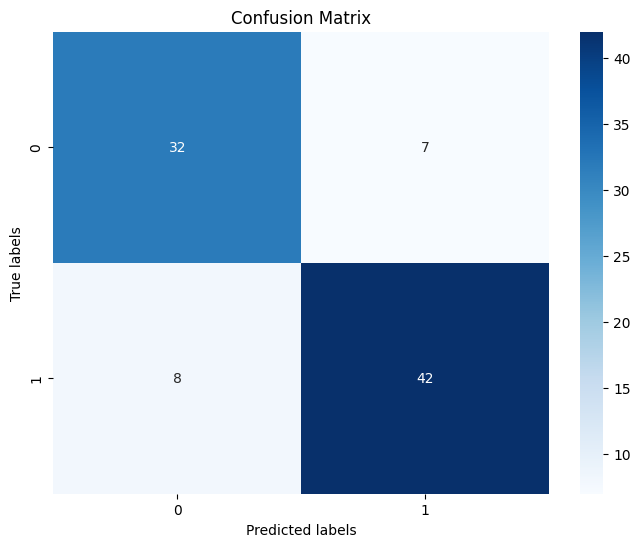

In [134]:
# Matriz de confusión heatmap KNN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, Y_pred) #Generar matriz

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [135]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el clasificador del árbol de decisión
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print("Precisión del modelo Árbol de Decisión:", accuracy_dt)

Precisión del modelo Árbol de Decisión: 0.9325842696629213


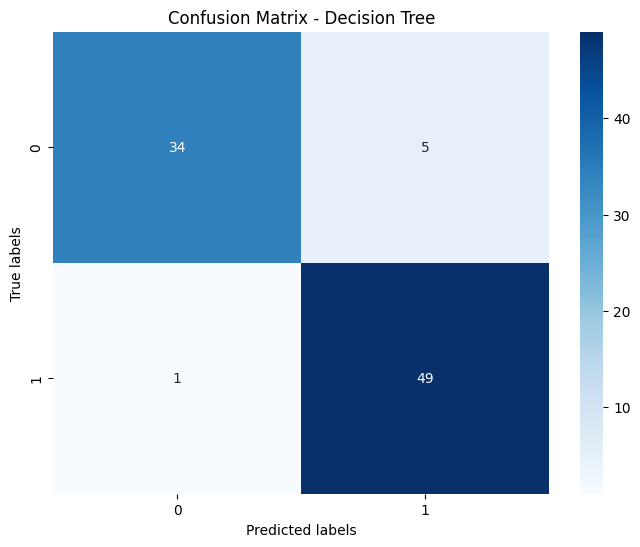

In [136]:
# creating confusion matrix heatmap (Decision Tree)
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# SVM

In [137]:
# Support Vector Machine
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Precisión del modelo SVM:", accuracy_svm)

Precisión del modelo SVM: 0.797752808988764


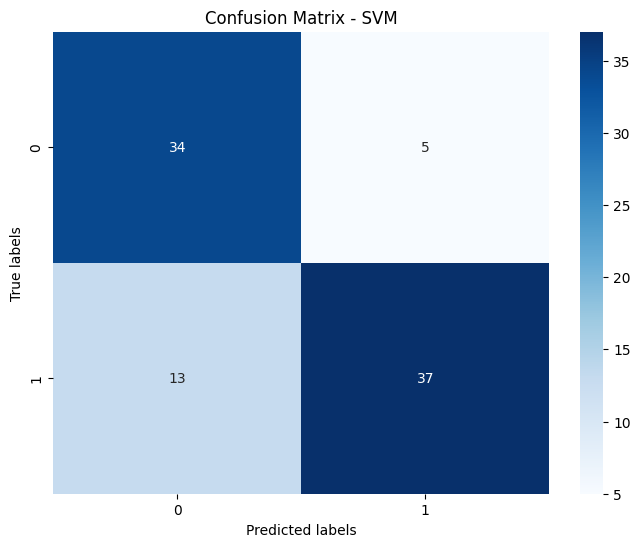

In [138]:
# creating confusion matrix heatmap SVM
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')
plt.show()


# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Precisión del modelo RandomForest:", accuracy_rf)

Precisión del modelo RandomForest: 0.898876404494382


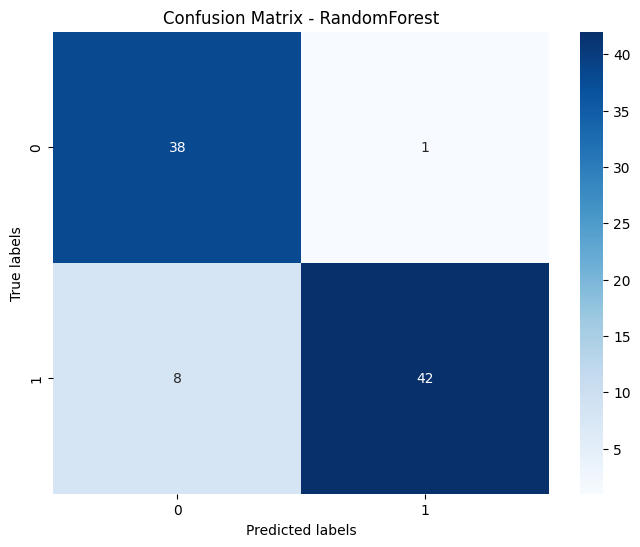

In [140]:
# creating confusion matrix heatmap - Random Forest

conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Gaussian Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB
# Crear y entrenar el clasificador Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred_gnb = gnb_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy_gnb = accuracy_score(Y_test, Y_pred_gnb)
print("Precisión del modelo Gaussian Naive Bayes:", accuracy_gnb)

Precisión del modelo Gaussian Naive Bayes: 0.7640449438202247


# Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred_logistic = logistic_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy_logistic = accuracy_score(Y_test, Y_pred_logistic)
print("Precisión del modelo de Regresión Logística:", accuracy_logistic)

Precisión del modelo de Regresión Logística: 0.8089887640449438


## Single Input Predictions

Test si está prediciendo adecuadamente

# Sistema de Predicción

In [155]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    features = [[sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p]]
    prediction = dt_classifier.predict(features)

    return prediction
    #return 0

In [156]:
sl_no = 11
gender = "F"
ssc_p = 58.0
hsc_p = 61.0
degree_p = 60.0
workex = "Yes"
etest_p = 62.0
specialisation = "Mkt&Fin"
mba_p = 60.85

# Convertir variables categóricas a valores numéricos
gender_numeric = 1 if gender == 'F' else 0
workex_numeric = 1 if workex == 'Yes' else 0
specialisation_numeric = 1 if specialisation == 'Mkt&Fin' else 0

result = prediction(sl_no, gender_numeric, ssc_p, hsc_p, degree_p, workex_numeric, etest_p, specialisation_numeric, mba_p)

if result == 1:
    print('Contratado')
else:
    print('No Contratado')


No Contratado



Se emplea un modelo de Clasificador Random Forest para predecir las colocaciones laborales basadas en características de entrada como los puntajes académicos, la experiencia laboral y otros factores relevantes. El modelo se entrena con datos históricos para aprender patrones y hacer predicciones precisas.

# Guardar Archivos

In [158]:
import pickle

pickle.dump(dt_classifier,open('model.pkl','wb'))
pickle.dump(scaler,open('standscaler.pkl','wb'))